In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from astropy.constants import a0, alpha
from astropy.time import Time
import scipy
from tqdm import tqdm

import setigen as stg
import blscint as bls

import logging 
import jort

In [2]:
%matplotlib inline

In [3]:
stg.params_from_backend()

{'tchans': 16, 'df': 2.7939677238464355, 'dt': 18.253611008}

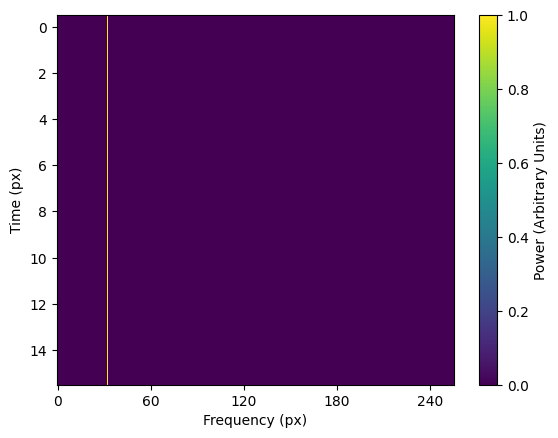

In [4]:
fr = stg.Frame(shape=(16, 256))
fr.add_constant_signal(f_start=fr.get_frequency(32),
                       drift_rate=0,
                       level=1,
                       width=fr.df,
                       f_profile_type='box')
fr.plot('px', db=False)
plt.show()

In [5]:
spec = stg.integrate(fr, as_frame=True)
ts = stg.integrate(fr, axis=1, mode='sum', as_frame=True)

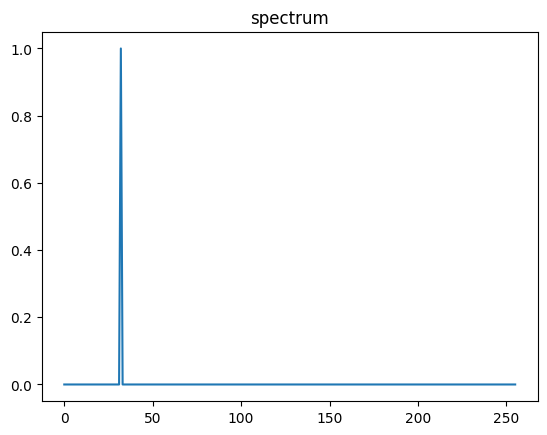

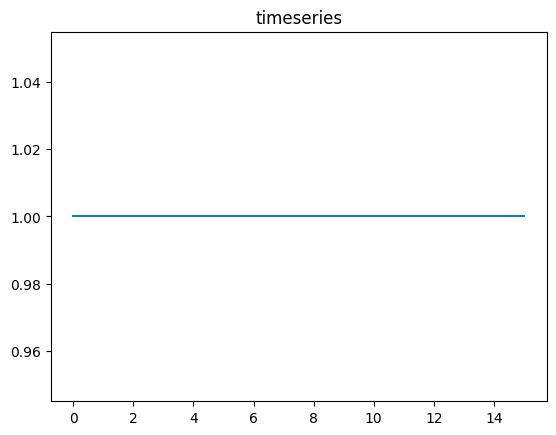

In [6]:
plt.plot(spec.array())
plt.title('spectrum')
plt.show()

plt.plot(ts.array())
plt.title('timeseries')
plt.show()

In [26]:
spec.dt, spec.tchans

(292.057776128, 1)

In [27]:
ts.df, ts.fchans, ts.fch1, fr.fch1, ts.fmin, ts.fmid, ts.fmax

(715.2557373046875,
 1,
 5999999643.769115,
 6000000000.0,
 5999999643.769115,
 5999999643.769115,
 5999999643.769115)

In [28]:
fr.fmin, fr.fmid, fr.fmax

(5999999287.538231, 5999999643.769115, 6000000000.0)

In [29]:
spec, stg.get_slice(spec, 16, 32)

(<setigen.spectrum.Spectrum at 0x7f07112f7e50>,
 <setigen.spectrum.Spectrum at 0x7f07112f9360>)

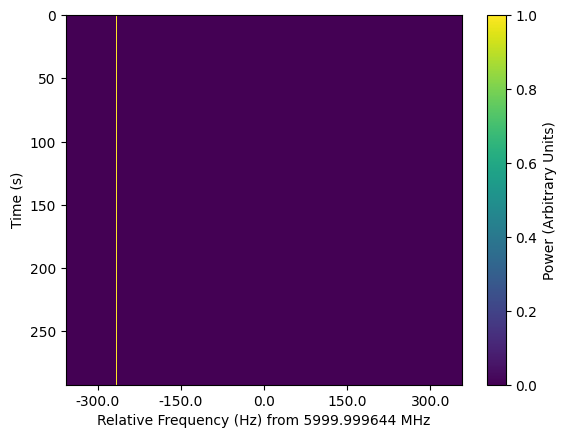

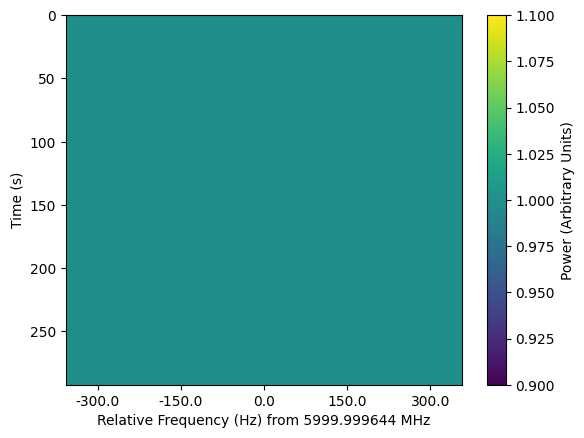

In [30]:
spec.plot(db=False)
plt.show()

ts.plot(db=False)
plt.show()

In [31]:
a = {1: 2}
a

{1: 2}

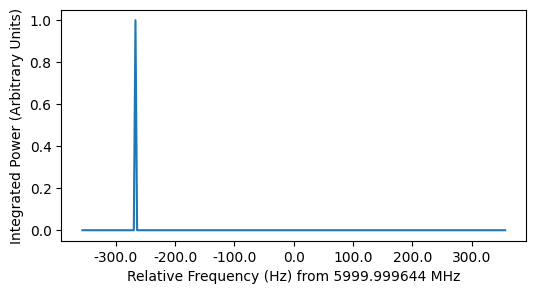

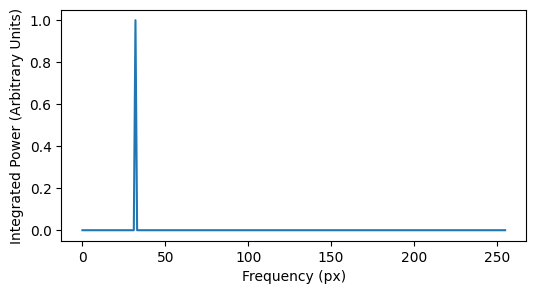

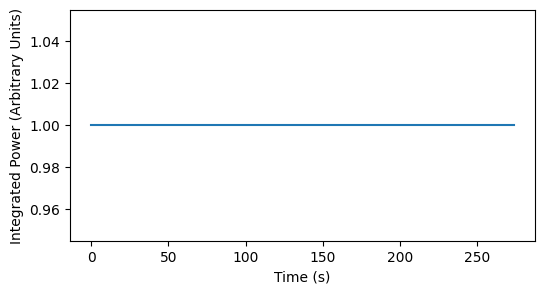

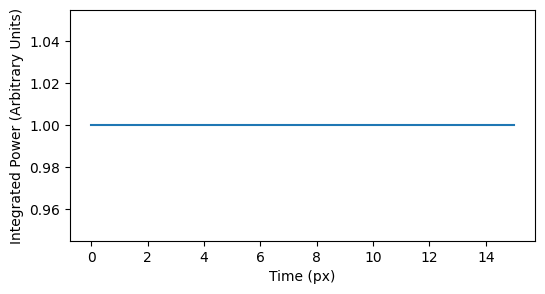

In [19]:
fig = plt.figure(figsize=(6, 3))
spec.plot(db=False)
plt.show()

fig = plt.figure(figsize=(6, 3))
spec.plot("px", db=False)
plt.show()


fig = plt.figure(figsize=(6, 3))
ts.plot(db=False)
plt.show()

fig = plt.figure(figsize=(6, 3))
ts.plot("px", db=False)
plt.show()

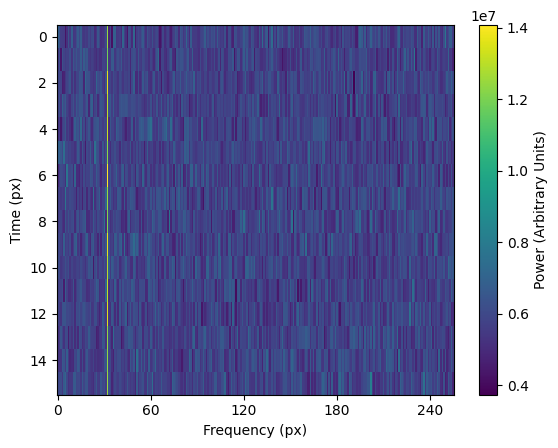

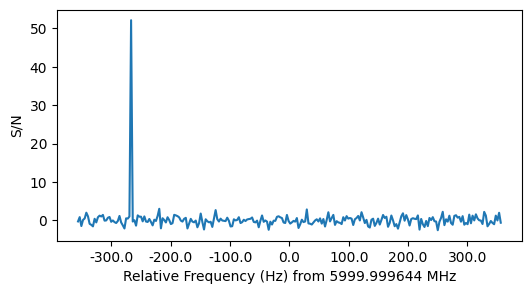

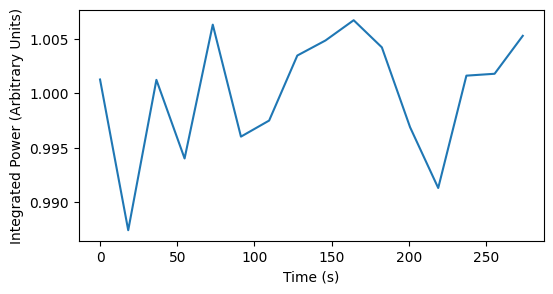

In [28]:
fr = stg.Frame(shape=(16, 256))
fr.add_noise_from_obs()
fr.add_constant_signal(f_start=fr.get_frequency(32),
                       drift_rate=0,
                       level=fr.get_intensity(snr=50),
                       width=fr.df,
                       f_profile_type='box')
fr.plot('px', db=False)
plt.show()

spec = stg.integrate(fr, as_frame=True)
ts = stg.integrate(fr, axis=1, mode='sum', as_frame=True)

fig = plt.figure(figsize=(6, 3))
spec.plot(snr=True)
plt.show()

fig = plt.figure(figsize=(6, 3))
ts.plot(norm=True)
plt.show()